In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stat
from sklearn import model_selection
from scipy import stats
import pandas.plotting

In [2]:
test=pd.read_csv('C:/Users/user/Desktop/DS.Ebin/AV_Training/loan_prediction/test.csv')
train=pd.read_csv('C:/Users/user/Desktop/DS.Ebin/AV_Training/loan_prediction/train.csv')

In [3]:
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train['source']='train'
test['source']='test'

In [6]:
data=pd.concat([train,test])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [8]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


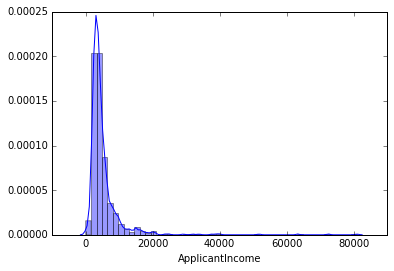

In [9]:
sn.distplot(data['ApplicantIncome'])
plt.show()

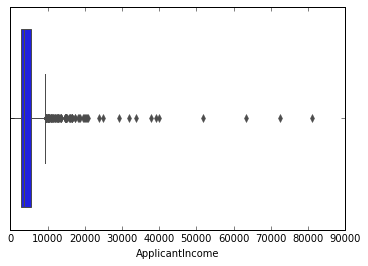

In [10]:
sn.boxplot(data['ApplicantIncome'])
plt.show()

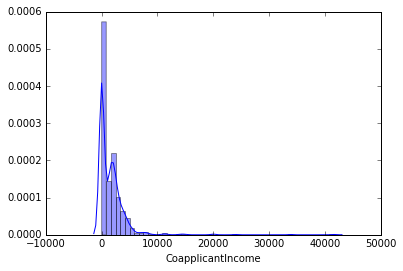

In [11]:
sn.distplot(data['CoapplicantIncome'])
plt.show()

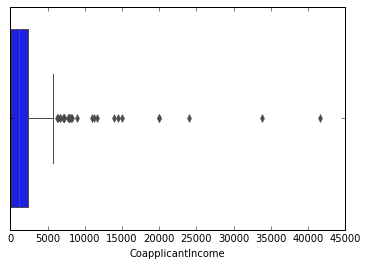

In [12]:
sn.boxplot(data['CoapplicantIncome'])
plt.show()

In [13]:
data['Income']=np.log10(data['ApplicantIncome']+data['CoapplicantIncome'])

In [14]:
data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

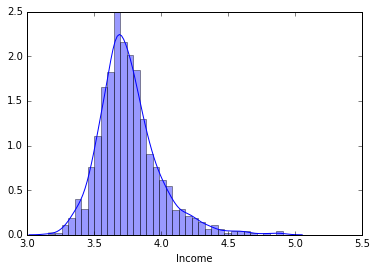

In [15]:
sn.distplot(data['Income'])
plt.show()

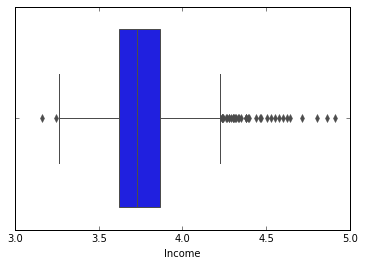

In [16]:
sn.boxplot(data['Income'])
plt.show()

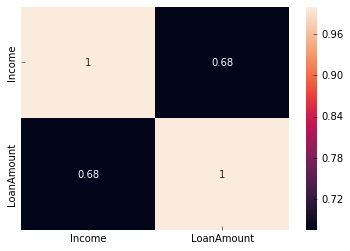

In [17]:
sn.heatmap(data[['Income','LoanAmount']].corr(),annot=True)
plt.show()

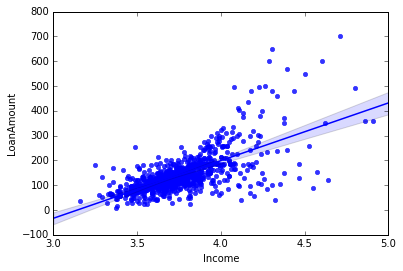

In [18]:
sn.regplot(data['Income'],data['LoanAmount'])
plt.show()

In [19]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})


In [20]:
data.corr()

,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status,Income
Credit_History,1.000000,-0.008235,-0.020439,0.561678,0.039500
LoanAmount,-0.008235,1.000000,0.055636,-0.037318,0.676003
Loan_Amount_Term,-0.020439,0.055636,1.000000,-0.021268,-0.036563
Loan_Status,0.561678,-0.037318,-0.021268,1.000000,0.007240
Income,0.039500,0.676003,-0.036563,0.007240,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      902 non-null float64
Dependents          956 non-null object
Education           981 non-null object
Gender              957 non-null object
LoanAmount          954 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             978 non-null object
Property_Area       981 non-null object
Self_Employed       926 non-null object
source              981 non-null object
Income              981 non-null float64
dtypes: float64(5), object(8)
memory usage: 107.3+ KB


In [22]:
import missingno as msn

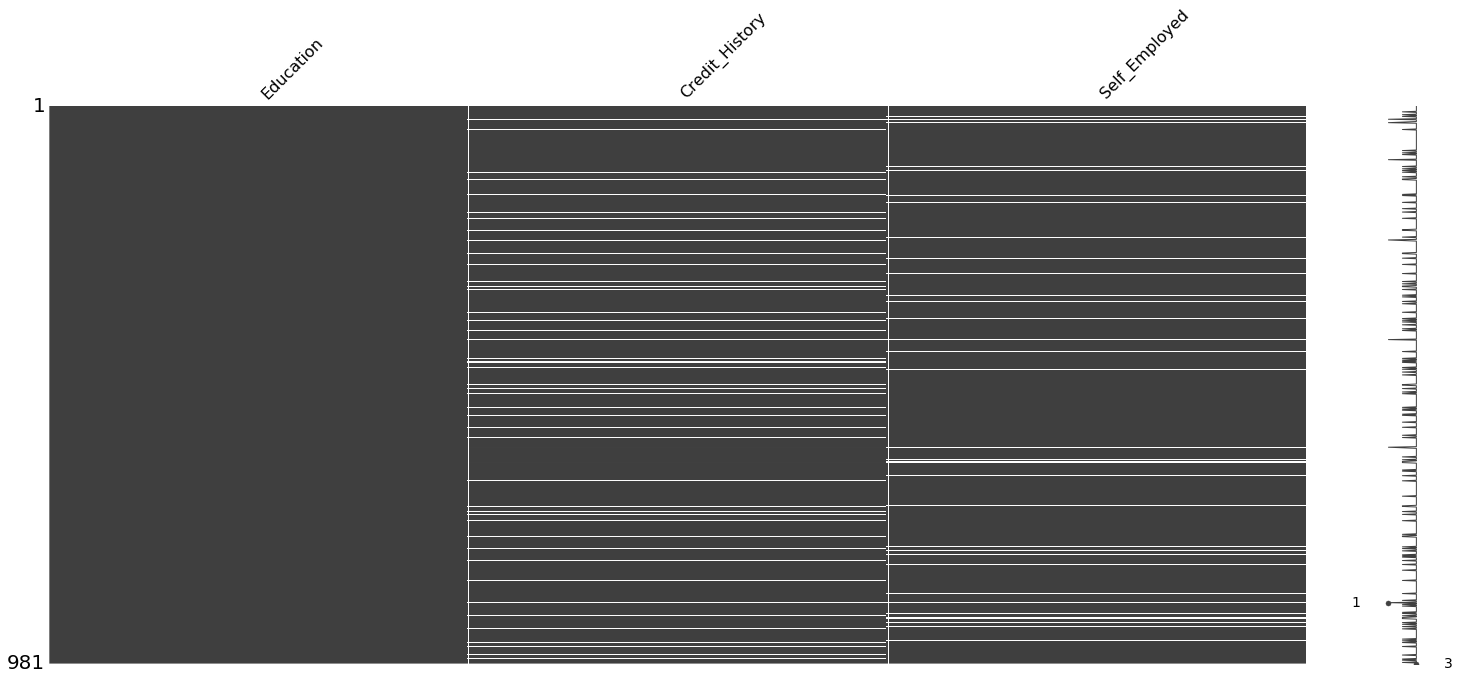

In [23]:
msn.matrix(data[['Education','Credit_History','Self_Employed']])
plt.show()

In [24]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})

In [25]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})

In [26]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [27]:
data['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [28]:
data['Gender'].fillna('Male',inplace=True)

In [29]:
data['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [30]:
data['Married']=data['Married'].map({'Yes':1,'No':0})

In [31]:
data.corr()

,Credit_History,Education,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Self_Employed,Income
Credit_History,1.000000,0.066182,-0.007624,-0.020439,0.561678,0.021840,0.035852,0.039500
Education,0.066182,1.000000,0.163174,0.024396,0.085884,-0.027459,0.011429,0.215370
LoanAmount,-0.007624,0.163174,1.000000,0.054560,-0.032864,0.155429,0.113392,0.663366
Loan_Amount_Term,-0.020439,0.024396,0.054560,1.000000,-0.021268,-0.049497,-0.034812,-0.036563
Loan_Status,0.561678,0.085884,-0.032864,-0.021268,1.000000,0.089280,-0.002303,0.007240
Married,0.021840,-0.027459,0.155429,-0.049497,0.089280,1.000000,0.013733,0.151474
Self_Employed,0.035852,0.011429,0.113392,-0.034812,-0.002303,0.013733,1.000000,0.167063
Income,0.039500,0.215370,0.663366,-0.036563,0.007240,0.151474,0.167063,1.000000


In [32]:
pd.crosstab(data.Dependents,data.Married)

Married,0.0,1.0
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [33]:
data['Dependents']=data['Dependents'].map(lambda x: 0 if x=='0' else 1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      902 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             978 non-null float64
Property_Area       981 non-null object
Self_Employed       926 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 107.3+ KB


In [35]:
data['Dependents'].value_counts()

0    545
1    436
Name: Dependents, dtype: int64

In [36]:
data.corr()

,Credit_History,Dependents,Education,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Self_Employed,Income
Credit_History,1.000000,-0.025326,0.066182,-0.007624,-0.020439,0.561678,0.021840,0.035852,0.039500
Dependents,-0.025326,1.000000,-0.054827,0.122810,-0.081528,-0.006250,0.355516,0.050040,0.106370
Education,0.066182,-0.054827,1.000000,0.163174,0.024396,0.085884,-0.027459,0.011429,0.215370
LoanAmount,-0.007624,0.122810,0.163174,1.000000,0.054560,-0.032864,0.155429,0.113392,0.663366
Loan_Amount_Term,-0.020439,-0.081528,0.024396,0.054560,1.000000,-0.021268,-0.049497,-0.034812,-0.036563
Loan_Status,0.561678,-0.006250,0.085884,-0.032864,-0.021268,1.000000,0.089280,-0.002303,0.007240
Married,0.021840,0.355516,-0.027459,0.155429,-0.049497,0.089280,1.000000,0.013733,0.151474
Self_Employed,0.035852,0.050040,0.011429,0.113392,-0.034812,-0.002303,0.013733,1.000000,0.167063
Income,0.039500,0.106370,0.215370,0.663366,-0.036563,0.007240,0.151474,0.167063,1.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      902 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             978 non-null float64
Property_Area       981 non-null object
Self_Employed       926 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 107.3+ KB


In [38]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

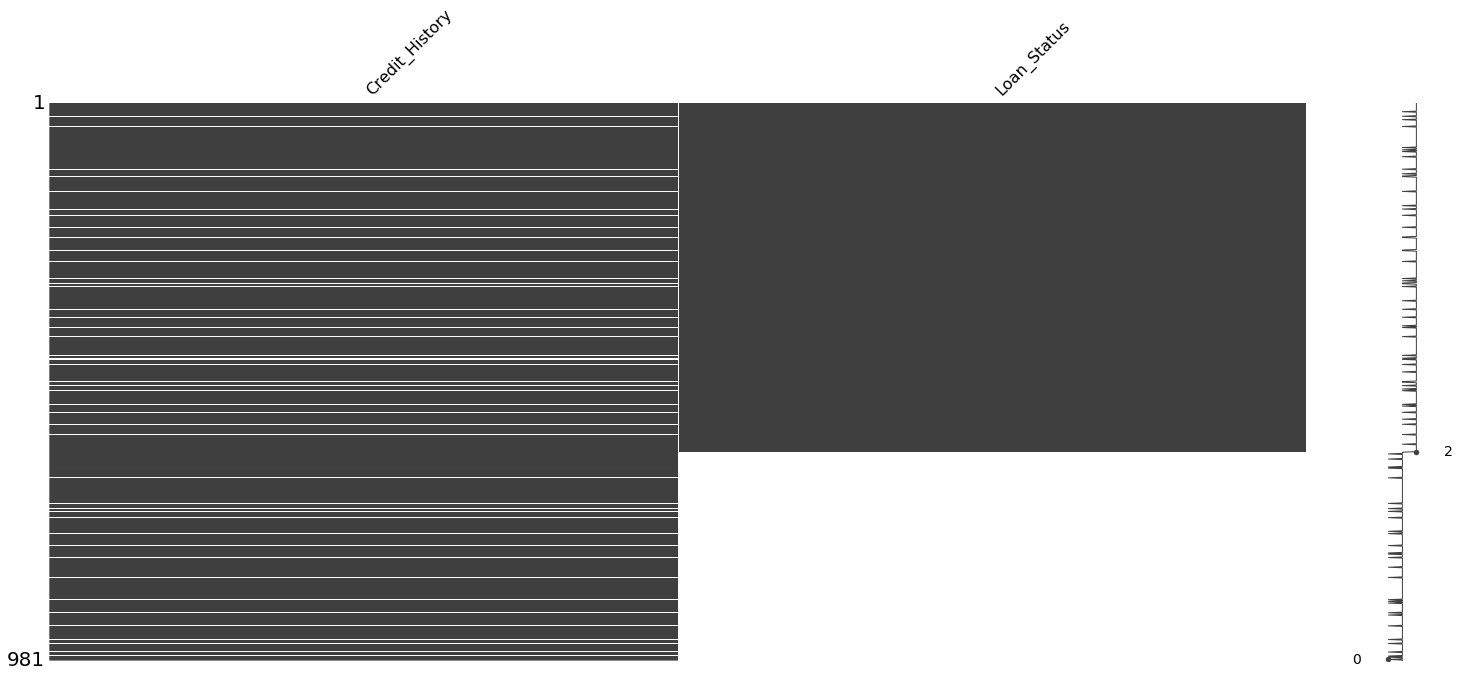

In [39]:
msn.matrix(data[['Credit_History','Loan_Status']])
plt.show()

In [40]:
data['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     NaN
17     0.0
18     1.0
19     1.0
20     0.0
21     1.0
22     0.0
23     0.0
24     NaN
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
337    1.0
338    1.0
339    0.0
340    1.0
341    1.0
342    1.0
343    1.0
344    1.0
345    1.0
346    0.0
347    1.0
348    1.0
349    1.0
350    1.0
351    NaN
352    1.0
353    1.0
354    0.0
355    1.0
356    1.0
357    1.0
358    NaN
359    1.0
360    NaN
361    1.0
362    1.0
363    1.0
364    NaN
365    1.0
366    1.0
Name: Credit_History, Length: 981, dtype: float64

In [41]:
data['Credit_History'].fillna(1,inplace= True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      981 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             978 non-null float64
Property_Area       981 non-null object
Self_Employed       926 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 127.3+ KB


In [43]:
data['Self_Employed'].fillna(0,inplace=True)

In [44]:
data['Self_Employed'].value_counts()

0.0    862
1.0    119
Name: Self_Employed, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      981 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             978 non-null float64
Property_Area       981 non-null object
Self_Employed       981 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 127.3+ KB


In [46]:
data['Married'].fillna(1,inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      981 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    961 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             981 non-null float64
Property_Area       981 non-null object
Self_Employed       981 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 127.3+ KB


In [48]:
data.Loan_Amount_Term.fillna(360,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Credit_History      981 non-null float64
Dependents          981 non-null int64
Education           981 non-null int64
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    981 non-null float64
Loan_ID             981 non-null object
Loan_Status         614 non-null float64
Married             981 non-null float64
Property_Area       981 non-null object
Self_Employed       981 non-null float64
source              981 non-null object
Income              981 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 127.3+ KB


In [50]:
train=data[data['source']=='train']

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Credit_History      614 non-null float64
Dependents          614 non-null int64
Education           614 non-null int64
Gender              614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Loan_ID             614 non-null object
Loan_Status         614 non-null float64
Married             614 non-null float64
Property_Area       614 non-null object
Self_Employed       614 non-null float64
source              614 non-null object
Income              614 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 67.2+ KB


In [52]:
test=data[data['source']=='test']

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [70]:
train.drop(['Loan_ID','source','Property_Area','Gender'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
X=train.drop('Loan_Status',axis=1)

In [72]:
y=train['Loan_Status']


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 9 columns):
Credit_History      614 non-null float64
Dependents          614 non-null int64
Education           614 non-null int64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Loan_Status         614 non-null float64
Married             614 non-null float64
Self_Employed       614 non-null float64
Income              614 non-null float64
dtypes: float64(7), int64(2)
memory usage: 68.0 KB


In [74]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
clf.score(X,y)

0.80944625407166126